In [339]:
import numpy as np
import pandas as pd
from plotnine import *
import random
import os
import pathlib
import datetime

In [363]:
mt = theme(figure_size=(15,5) , panel_background=element_rect(fill="#f2e9e4") , panel_grid_major=element_line(alpha=0.5))

In [364]:
dfs = [pd.read_csv(pathlib.Path("." , "output" , f)) for f in os.listdir("output") if f.find(".log") > -1]

In [365]:
df = pd.concat(dfs)

In [366]:
df = df.iloc[: , 1:]
df["time"] = pd.to_datetime(df["time"])

In [367]:
mac_to_person_const = ((1900 + 2*250 + 3*50)/(1900 + 250 + 50))
mac_to_person_const = 1/mac_to_person_const
mac_to_person_const

0.8627450980392156

In [368]:
def time_cols(df):
    df["date"] = df["time"].dt.month.astype(str) +"-" + df["time"].dt.day.astype(str)
    df["day"] = df["time"].dt.dayofweek
    df["week"] = df["time"].dt.week.astype("category")
    df["time_of_day"] = df["time"].apply(lambda d : datetime.datetime.time(d)).astype("category")
    return df

In [369]:
df = time_cols(df)

In [370]:
df

,mac,time,building,date,day,week,time_of_day
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,38,09:15:00
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,38,09:30:00
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,38,09:45:00
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,38,10:00:00
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,38,11:00:00
...,...,...,...,...,...,...,...
13657,fe:df:d2:2c:85:5b,2020-10-10 00:15:00,Facilities Management & Police,10-10,5,41,00:15:00
13658,fe:ee:5a:5f:86:32,2020-10-10 14:45:00,Belk Hall,10-10,5,41,14:45:00
13659,fe:f4:f8:45:90:e4,2020-10-10 14:15:00,Motorsports Research,10-10,5,41,14:15:00
13660,fe:f4:f8:45:90:e4,2020-10-10 14:30:00,Motorsports Research,10-10,5,41,14:30:00


In [348]:
final_building_counts["date"] = final_building_counts["time"].dt.month.astype(str) +"-" + final_building_counts["time"].dt.day.astype(str)
final_building_counts["day"] = final_building_counts["time"].dt.dayofweek.astype(str)
final_building_counts["time_of_day"] = final_building_counts["time"].apply(lambda d : datetime.datetime.time(d)).astype("category")

In [349]:
final_building_counts

,time,n_unq_mac,users,date,day,time_of_day
0,2020-09-14 00:00:00,65,63.725490,9-14,0,00:00:00
1,2020-09-14 00:15:00,74,72.549020,9-14,0,00:15:00
2,2020-09-14 00:30:00,51,50.000000,9-14,0,00:30:00
3,2020-09-14 00:45:00,54,52.941176,9-14,0,00:45:00
4,2020-09-14 01:00:00,72,70.588235,9-14,0,01:00:00
...,...,...,...,...,...,...
1627,2020-09-30 22:45:00,185,181.372549,9-30,2,22:45:00
1628,2020-09-30 23:00:00,174,170.588235,9-30,2,23:00:00
1629,2020-09-30 23:15:00,170,166.666667,9-30,2,23:15:00
1630,2020-09-30 23:30:00,161,157.843137,9-30,2,23:30:00


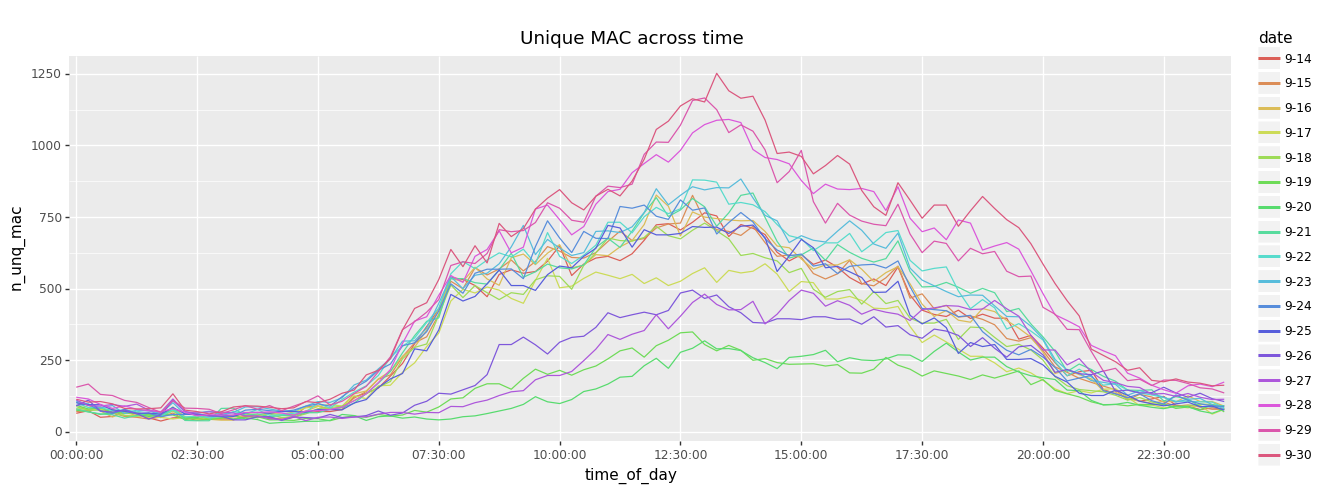

<ggplot: (161502386415)>

In [350]:
(
    ggplot(final_building_counts
          ,aes(x="time_of_day" , y="n_unq_mac" , color="date" , group="date"))
    + geom_line()
    #+ geom_smooth()
    + ggtitle("Unique MAC across time")
    + theme(figure_size=(15,5))
    + scale_x_discrete(breaks=final_building_counts["time_of_day"].unique()[np.arange(0,96,10)])
)

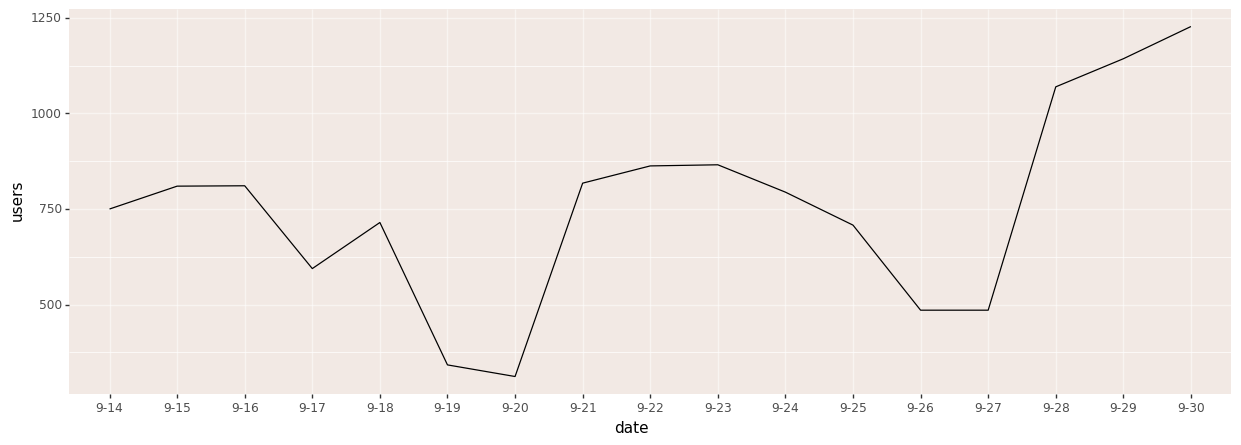

<ggplot: (-9223371875347885126)>

In [351]:
(
    ggplot(final_building_counts.groupby("date")["users"].max().reset_index())
    + geom_line(aes(x="date" , y="users") , group=1)
    + mt
)

In [371]:
def get_daily_counts(df , additional_grouper=[]):
    return (
            df.groupby([pd.Grouper(key="time" , freq="1d")] + additional_grouper)
             .apply(lambda df : df["mac"].nunique()*mac_to_person_const)
             .reset_index()
             .rename({0 : "count"} , axis=1)
    )

In [372]:
dailycounts = get_daily_counts(df)

In [373]:
dailycounts["macbased"] = True

In [374]:
access_count = pd.read_excel("access_count_data_9-14to9-28.xlsx")

In [375]:
access_count = access_count.groupby("EventDateTime")["access_count"].sum().reset_index()
access_count["macbased"] = False
access_count.columns = dailycounts.columns
dailycounts = dailycounts.append(access_count)

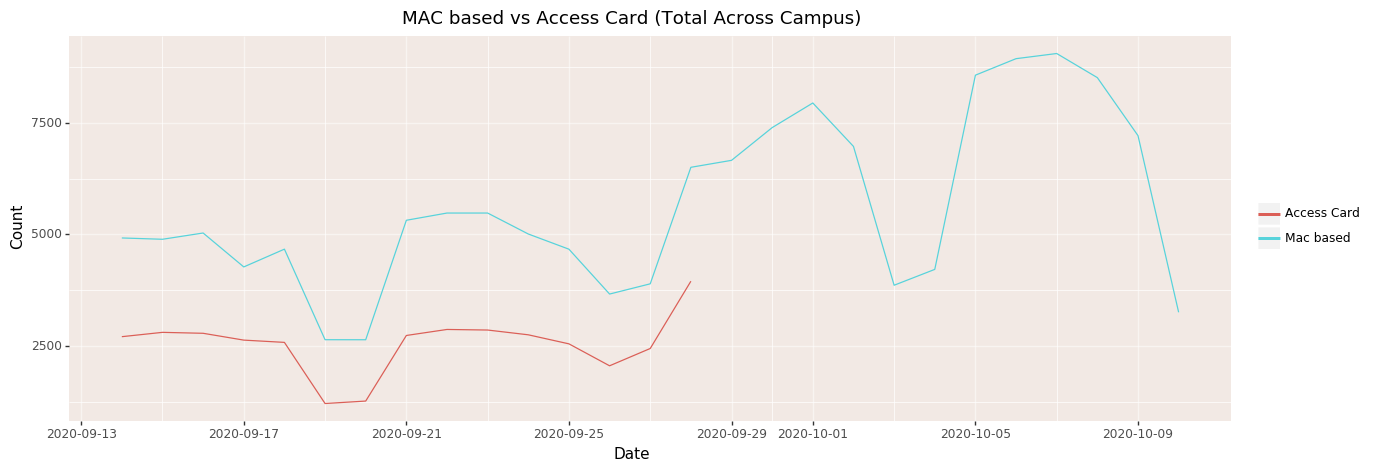

<ggplot: (-9223371875331661105)>

In [401]:
(
    ggplot(dailycounts)
    + geom_line(aes(x="time" , y="count" , color="macbased" , group="macbased"))
    #+ geom_line(access_count.groupby("EventDateTime")["access_count"].sum().reset_index() , aes(x="EventDateTime" , y="access_count") , color="red")
    + mt
    + scale_color_discrete(labels=[ "Access Card" , "Mac based" ])
    + ggtitle("MAC based vs Access Card (Total Across Campus)")
    + xlab("Date")
    + ylab("Count")
    + theme(legend_title=element_blank())
)

In [317]:
df

,mac,time,building,date,day,time_of_day,week
0,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:15:00,Storrs,9-14,0,09:15:00,38
1,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:30:00,Storrs,9-14,0,09:30:00,38
2,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 09:45:00,Storrs,9-14,0,09:45:00,38
3,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 10:00:00,Storrs,9-14,0,10:00:00,38
4,woPCl8KfUGVawpjCrMKuw5PCqHTCk8KUwp3CmsKZ,2020-09-14 11:00:00,Storrs,9-14,0,11:00:00,38
...,...,...,...,...,...,...,...
57684,fe:f4:f8:45:90:e4,2020-10-08 17:15:00,EPIC,10-8,3,17:15:00,41
57685,fe:f4:f8:45:90:e4,2020-10-08 17:30:00,Motorsports Research,10-8,3,17:30:00,41
57686,fe:f4:f8:45:90:e4,2020-10-08 18:00:00,Motorsports Research,10-8,3,18:00:00,41
57687,fe:f6:55:78:fb:9b,2020-10-08 21:45:00,Bioinformatics,10-8,3,21:45:00,41


In [392]:
weeki = 41
weekdf = df[df["week"].isin([weeki , weeki-1])]
weekdf = time_cols(get_daily_counts(weekdf , ["building"]))
weekdf

,time,building,count,date,day,week,time_of_day
0,2020-09-28,Atkins,362.352941,9-28,0,40,00:00:00
1,2020-09-28,Auxiliary Services Building,126.823529,9-28,0,40,00:00:00
2,2020-09-28,Barnard,52.627451,9-28,0,40,00:00:00
3,2020-09-28,Barnhardt Student Activity Center,172.549020,9-28,0,40,00:00:00
4,2020-09-28,Baseball Indoor Training Facility,76.784314,9-28,0,40,00:00:00
...,...,...,...,...,...,...,...
1109,2020-10-10,Wallis Hall,51.764706,10-10,5,41,00:00:00
1110,2020-10-10,Wells Fargo Field House,12.078431,10-10,5,41,00:00:00
1111,2020-10-10,Winningham,6.901961,10-10,5,41,00:00:00
1112,2020-10-10,Witherspoon,63.843137,10-10,5,41,00:00:00


In [395]:
weekdf["building"] = weekdf["building"].astype("category").cat.reorder_categories(weekdf.groupby("building")["count"].max().sort_values(ascending=False).index.values.astype(str))

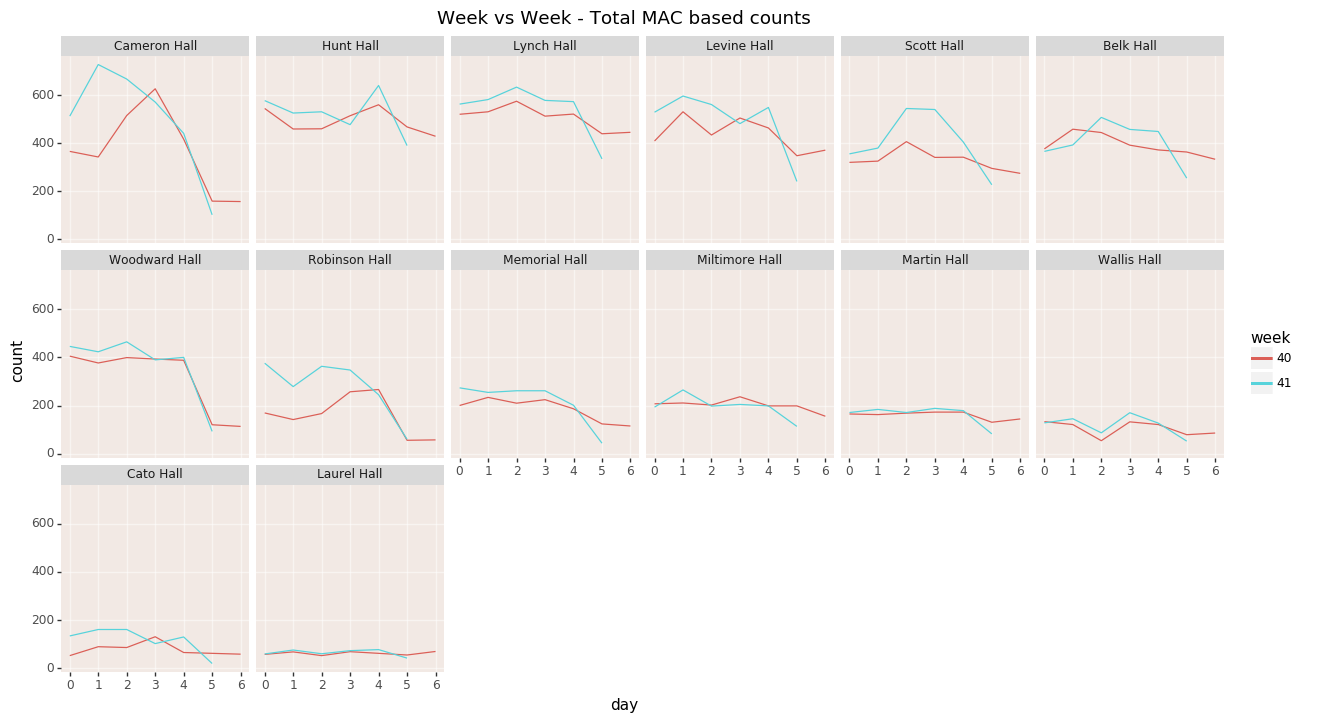

<ggplot: (161533887538)>

In [404]:
(
    ggplot(weekdf[weekdf["building"].str.lower().str.find("hall") > -1] , aes(x="day" , y="count" , group="week",color="week" ))
    + geom_line()
    + mt
    + facet_wrap("~ building" , ncol=6)
    + scale_x_continuous(breaks=np.arange(0,7))
    + theme(figure_size=(15,8) , panel_grid_minor=element_blank())
    + ggtitle("Week vs Week - Total MAC based counts")
)

In [380]:
def dayinlife(df , mac , day="10-5"):
    sub = df[(df["date"] == day) & (df["mac"] == mac)]
    #print(sub)
    p = (
        ggplot(sub , aes(x="time" , y="building"))
        + geom_point()
        + geom_line(group=1 , alpha=0.2)
       # + scale_x_discrete(breaks = np.arange(0,24,1))
        + scale_x_datetime(breaks='1 hour', date_labels="%H:%M") 
        + theme(axis_text_x=element_text(rotation=45))
        + mt
    )
    print(p)

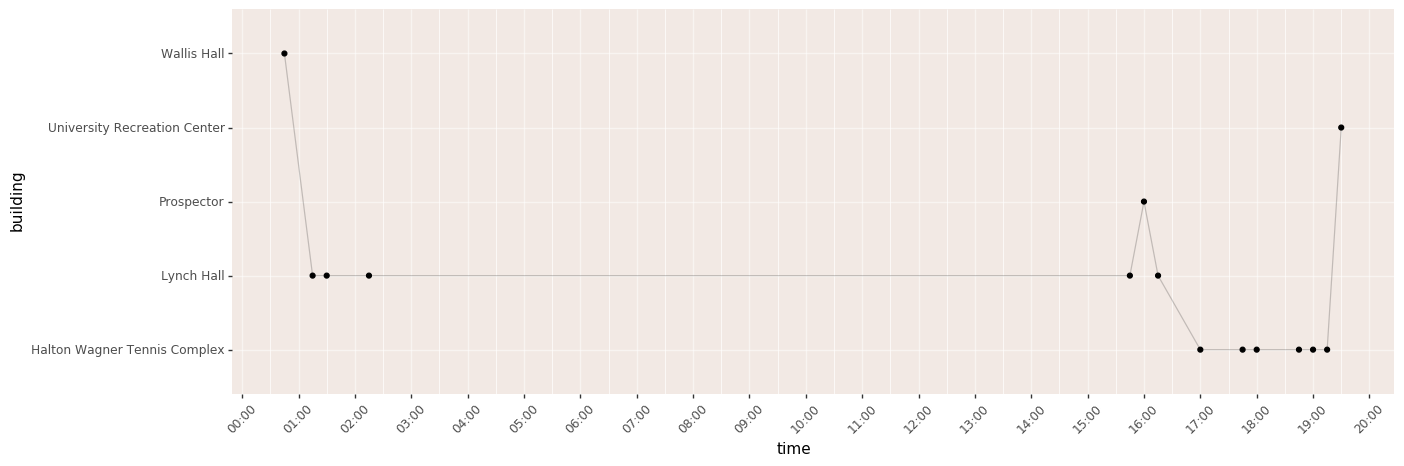

<ggplot: (-9223371875312930549)>


In [381]:
dayinlife(df , "6e:ca:fd:1f:86:0a")

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


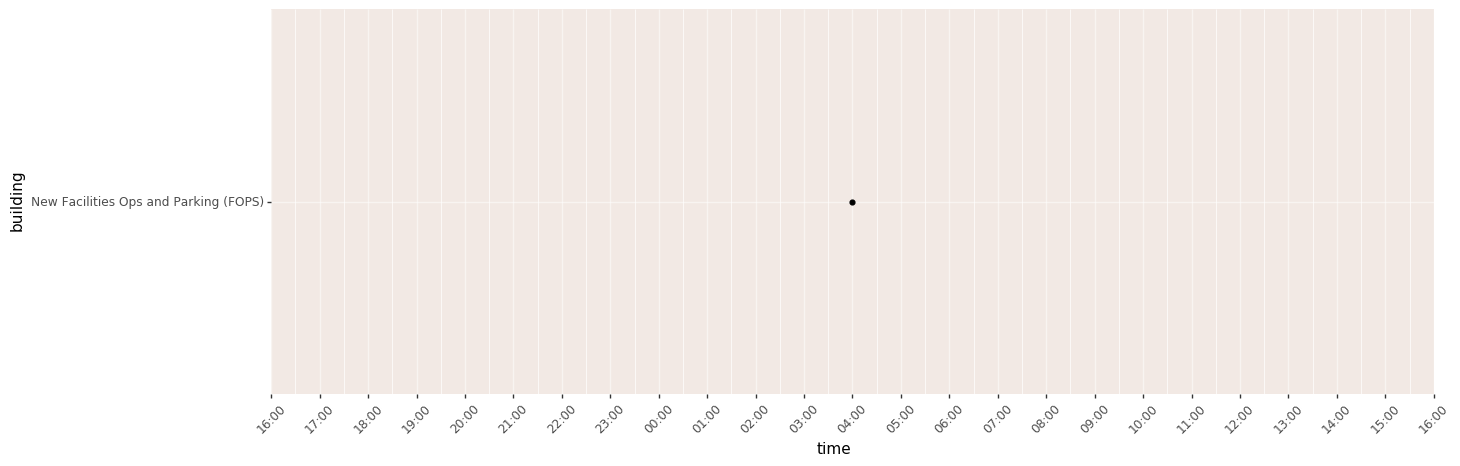

<ggplot: (-9223371875347925581)>


In [293]:
dayinlife(df , "c0:d3:c0:75:46:cd")

In [294]:
facmac = ['c0:33:5e:0d:da:8f', '04:e5:36:1a:ae:21', 'd8:c4:97:fe:2f:79',
       '64:5d:86:96:d4:26', 'd8:c4:97:fe:2d:e5', 'a4:e9:75:55:7c:61',
       '40:83:de:f6:d9:2b', '40:d3:ae:e7:84:8c', '00:5b:94:1a:58:5c',
       'a4:08:ea:25:86:07', '3c:cd:36:18:a6:85', 'd0:7f:a0:05:2d:fb',
       '90:b6:86:b6:a4:72', 'c0:d3:c0:61:59:8f', 'ce:6c:44:15:f1:04',
       'd8:c4:97:fd:73:d3', 'a4:08:ea:27:e6:13', 'c0:bd:c8:fc:36:ed',
       'c0:d3:c0:75:46:cd', 'd8:c4:97:fe:35:4f', '00:12:cc:00:24:49',
       'c0:d3:c0:61:59:d3', '00:12:cc:00:3c:3f', 'dc:f7:56:15:51:4e',
       'a4:6c:f1:e7:fa:75', 'b4:ae:2b:e5:06:06', '00:12:cc:00:43:db',
       '00:12:cc:00:26:71', 'd0:7f:a0:87:a8:73', '8c:c6:81:a5:f4:ec',
       '3a:cd:90:41:0b:b5', 'd8:c4:97:fe:37:d7', 'd8:c4:97:fd:78:e5',
       '0e:75:63:b2:0b:55', 'a4:08:ea:ab:a7:59', '28:56:5a:10:a7:c5',
       'd0:7f:a0:05:2e:47', '00:12:cc:00:22:69', 'c0:d3:c0:61:58:c3',
       '30:57:14:a1:41:30', 'ec:ce:d7:84:14:d2', '00:12:cc:00:42:52',
       'dc:f7:56:15:50:fe', '80:86:f2:8e:94:a5', '00:12:cc:00:24:0a',
       'a4:6c:f1:ab:43:cd', '00:12:cc:00:23:50', 'dc:f7:56:15:4e:86',
       '3c:dc:bc:e3:25:05', '24:18:1d:27:a3:ca', 'c0:d3:c0:6c:30:a9',
       'a4:08:ea:27:e1:71', '70:bc:10:6f:c6:2b', 'f8:2d:7c:b1:88:3d',
       '46:b6:73:05:63:80', 'c8:d0:83:6e:24:16', '6c:19:c0:60:15:a5',
       '70:3c:69:b1:bb:d3', 'a0:99:9b:18:5c:33', '66:0e:2a:cc:99:18',
       '80:b0:3d:1b:90:b7', 'c4:98:80:40:47:28', 'b2:02:16:a2:90:cc',
       '00:17:23:e1:d1:30', 'e6:ef:ab:c5:8a:20', 'f8:95:ea:98:2b:d8',
       'a6:7d:b3:72:eb:1a', 'a6:c0:79:54:3e:50', 'c0:ee:fb:ff:74:a2',
       'ce:9e:1c:1e:d0:36', 'b0:19:c6:c6:d8:cd', 'f8:4e:73:6b:24:48',
       'b8:7b:c5:1e:d5:c3', '9c:64:8b:9e:00:eb', '18:d6:c7:08:42:27',
       'cc:2d:b7:b1:0e:2e', 'd4:f4:6f:a8:1e:c1', 'bc:09:63:03:21:53',
       'ae:f5:14:4b:c8:a4', 'ac:37:43:e0:64:15', 'e8:50:8b:52:00:d2',
       '58:7f:57:7a:d8:4d', '96:4c:82:87:d8:e3', 'a0:4f:85:ca:c8:8d',
       '38:f9:d3:60:3e:e3', 'ac:15:f4:4e:99:b1', 'd0:13:fd:64:8a:90',
       'a0:56:f3:8d:6b:f4', '2e:1e:ae:00:77:d6', '5c:97:f3:0c:f9:7e',
       '50:5b:c2:ba:1f:41', '34:08:bc:0d:6d:5a', '0a:5e:a2:72:b7:e8',
       '9a:11:00:ce:74:20', 'f8:38:80:49:1f:b0', 'aa:3b:19:08:c5:16',
       '7c:a1:ae:b9:7e:4a', '32:b1:cc:0a:27:ab', 'a2:9a:5b:92:cb:9c',
       'ae:6a:43:fa:65:6d', 'bc:98:df:6d:f2:cf', 'c8:f6:50:73:6f:36',
       'b2:2f:c1:d7:da:ea', '2c:f0:ee:49:ca:3a', 'aa:56:f5:11:44:1a',
       '14:c8:8b:1b:e9:04', 'a4:6c:f1:a4:85:71', '86:e4:b9:7a:49:3b',
       '54:2b:8d:b2:93:38', 'f8:87:f1:4e:7a:b8', 'dc:2b:2a:9c:b7:81',
       '98:ca:33:21:16:0f', '8c:f1:12:54:5d:13', '8c:45:00:8f:9a:b1',
       '3c:28:6d:00:89:83', 'f2:57:08:c4:58:fe', '10:30:25:b7:84:70',
       'ae:48:97:4d:a2:64', 'ca:cd:62:72:6a:9d', '6a:1f:f9:3d:c6:1e',
       '2c:33:61:a0:af:0d', '14:d0:0d:92:d4:ff', 'fa:99:b0:4f:bc:ac',
       'bc:e1:43:c0:10:a4', '5c:09:47:b8:fe:71', '5c:f9:38:a5:c1:22',
       '28:16:a8:57:5f:e5', '86:c1:ac:5d:5d:82', 'f8:87:f1:54:97:54',
       '86:4c:fb:c3:c8:75', '5c:1d:d9:db:eb:17', '00:9d:6b:34:90:8b',
       '08:f8:bc:87:8d:68', 'd0:04:01:3a:d6:aa', '08:c5:e1:fc:71:24',
       'd4:4d:a4:e8:49:b9', '14:95:ce:cb:8e:cd']

In [300]:
df[df["mac"].isin(facmac)].groupby("mac")["building"].nunique().sort_values(ascending=False)[:10]

mac
00:12:cc:00:22:69    43
00:12:cc:00:43:db    38
d0:04:01:3a:d6:aa    36
2c:f0:ee:49:ca:3a    35
3a:cd:90:41:0b:b5    34
00:12:cc:00:23:50    30
08:f8:bc:87:8d:68    29
a4:6c:f1:e7:fa:75    28
00:12:cc:00:24:0a    27
ce:6c:44:15:f1:04    25
Name: building, dtype: int64

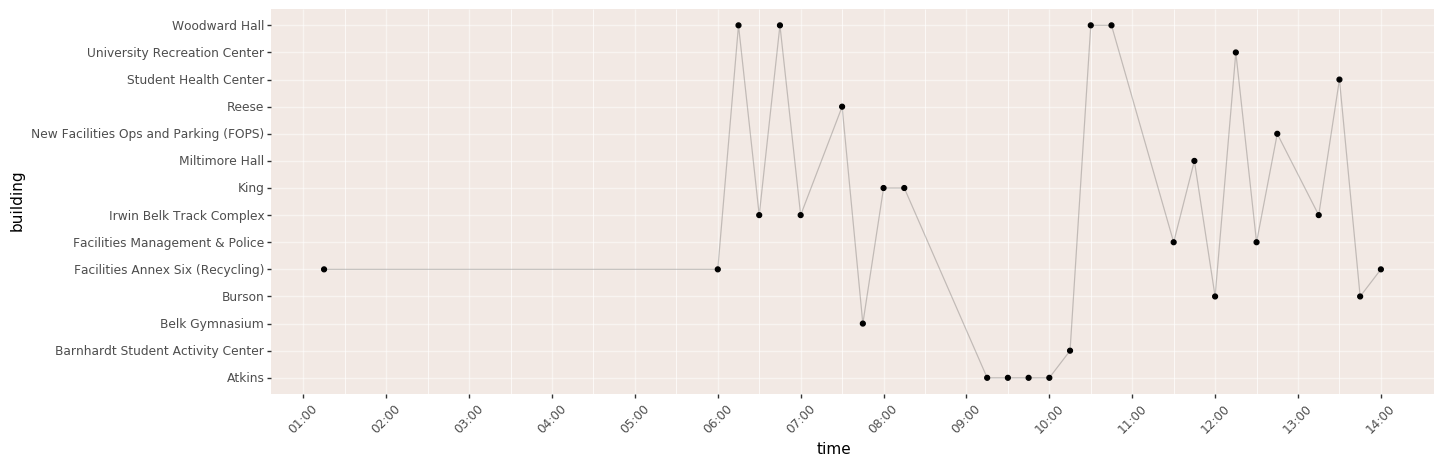

<ggplot: (-9223371875322039436)>


In [301]:
dayinlife(df , "00:12:cc:00:23:50" , day="10-6")

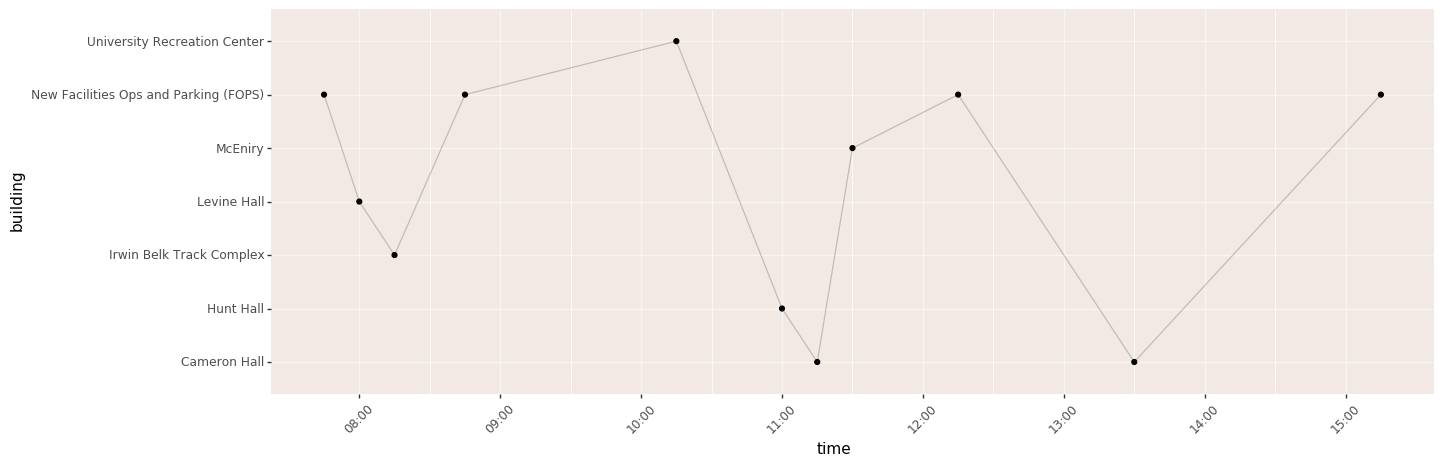

<ggplot: (-9223371875322050195)>


In [302]:
dayinlife(df , "c0:d3:c0:61:58:c3" , day="10-6")

In [329]:
import geocoder

In [338]:
geocoder.osm('EPIC ,University of North Carolina at charlotte')

<[ERROR - No results found] Osm - Geocode [empty]>

In [327]:
df["building"].unique()

array(['Storrs', 'Bioinformatics', 'EPIC', 'Center City Building',
       'Fretwell', 'Hunt Hall', 'Cameron Hall', 'Prospector',
       'Scott Hall', 'University Recreation Center', 'NRFC Fieldhouse',
       'Popp Martin Student Union',
       'New Facilities Ops and Parking (FOPS)', 'McMillan Greenhouse',
       'Burson', 'Denny', 'Kennedy', 'Friday', 'Cato Hall',
       'Gage Undergraduate Admissions Center', 'Housing & Residence Life',
       'Levine Hall', 'Facilities Annex Six (Recycling)',
       'Facilities Annex Seven (Grounds)', 'Irwin Belk Track Complex',
       'Facilities Management & Police', 'Belk Gymnasium', 'RUP 1',
       'King', 'Woodward Hall', 'College of Health and Human Services',
       'Atkins', 'Barnhardt Student Activity Center',
       'Student Health Center', 'Robinson Hall', 'Winningham', 'Macy',
       'Colvard', 'Smith', 'Auxiliary Services Building', 'RUP 4',
       'South Village Crossing', 'Memorial Hall', 'Belk Hall',
       'Witherspoon', 'Lynch Hall

In [ ]:
{
    "storrs" : "35.304495, -80.728968"
    ,"bioinformatics" : "35.312706, -80.741926"
    ,"epic" : "35.309017, -80.741558"
    ,"Center City Building" : "35.228381, -80.835039"
    ,"fretwell" : "35.306073, -80.729063"
    ,"hunt hall" :"35.301362, -80.736331"
    ,"Cameron hall":
    ,"scott hall" :"35.301649, -80.735275"
    ,"holshouser": "35.302139, -80.736078"
    ,"laurel hall" :"35.302682, -80.736163"
    ,"South Village Crossing" :"35.302932, -80.735058"
}